In this notebook I read the frequency differencing variables from ehcoview and categorise them.

In [97]:
import numpy as np
import pandas as pd
import scipy as sc
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib as mpl
from matplotlib.dates import DateFormatter

## Load data

In [98]:
fname1 = np.sort(glob.glob('D:/Sermilik/NNA_dBDiff_Export/*S18-Sv38.csv'))
fname2 =  np.sort(glob.glob('D:/Sermilik/NNA_dBDiff_Export/*S38-Sv120.csv'))
fname3 =  np.sort(glob.glob('D:/Sermilik/NNA_dBDiff_Export/*S38-Sv200.csv'))
fname4 =  np.sort(glob.glob('D:/Sermilik/NNA_dBDiff_Export/*S120-Sv200.csv'))
fname5 =  np.sort(glob.glob('D:/Sermilik/NNA_dBDiff_Export/*S38-Sv70.csv'))
fname6 =  np.sort(glob.glob('D:/Sermilik/NNA_dBDiff_Export/*Resample by number of pings T2.csv'))

df_18_38 = pd.DataFrame()
df_38_120 = pd.DataFrame()
df_38_200 = pd.DataFrame()
df_120_200 = pd.DataFrame()
df_38_70 = pd.DataFrame()
df_38 = pd.DataFrame()

flist = [fname1, fname2, fname3, fname4, fname5, fname6]

for i_flist in range(len(flist)):
    df_all = pd.DataFrame()
    for ind in np.arange(len(flist[i_flist])):
        filename = flist[i_flist][ind]
        df =  pd.read_csv(filename, 
                            header=None,
                            skiprows=1,
                            engine='python')
        df_all = pd.concat([df_all, df])
        Sv_diff = df_all.iloc[:,13:].T
        Sv_diff.iloc[0:3,:] = np.nan
        
    if i_flist == 0:
        df_18_38 = df_all
        Sv18_38 = Sv_diff
        Sv18_38 = Sv18_38.T.reset_index(drop=True).T
    elif i_flist == 1:
        df_38_120 = df_all
        Sv38_120 = Sv_diff
        Sv38_120 = Sv38_120.T.reset_index(drop=True).T
    elif i_flist == 2:
        df_38_200 = df_all
        Sv38_200 = Sv_diff
        Sv38_200 = Sv38_200.T.reset_index(drop=True).T
    elif i_flist == 3:
        df_120_200 = df_all
        Sv120_200 = Sv_diff
        Sv120_200 = Sv120_200.T.reset_index(drop=True).T
    elif i_flist == 4:
        df_38_70 = df_all
        Sv38_70 = Sv_diff
        Sv38_70 = Sv38_70.T.reset_index(drop=True).T
    elif i_flist == 5:
        df_38 = df_all
        Sv38 = Sv_diff
        Sv38 = Sv38.T.reset_index(drop=True).T

## Get time array

In [99]:
dtimes_18_38 =[]
for ind in range(0,len(df_18_38)):
            dtimes_18_38 = np.append(dtimes_18_38, datetime.strptime('%s %s.%s' %(df_18_38[3].values[ind],df_18_38[4].values[ind],int(df_18_38[5].values[ind])), '%Y-%m-%d %H:%M:%S.%f'))

In [100]:
dtimes_38 =[]
for ind in range(0,len(df_38)):
            dtimes_38 = np.append(dtimes_38, datetime.strptime('%s %s.%s' %(df_38[3].values[ind],df_38[4].values[ind],int(df_38[5].values[ind])), '%Y-%m-%d %H:%M:%S.%f'))

### 120-200

In [101]:
dtimes_120_200 =[]
for ind in range(0,len(df_120_200)):
            dtimes_120_200 = np.append(dtimes_120_200 , datetime.strptime('%s %s.%s' %(df_120_200 [3].values[ind],df_120_200 [4].values[ind],int(df_120_200 [5].values[ind])), '%Y-%m-%d %H:%M:%S.%f'))

C:\Users\murield\AppData\Local\Temp\ipykernel_17384\3975801061.py:12: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(ax_sv, shrink=0.8)
C:\Users\murield\AppData\Local\Temp\ipykernel_17384\3975801061.py:19: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(ax_sv, shrink=0.8)
C:\Users\murield\AppData\Local\Temp\ipykernel_17384\3975801061.py:26: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(ax_sv, shrink=0.8)
C:\Users\murield\AppData\Local\Temp\ipykernel_

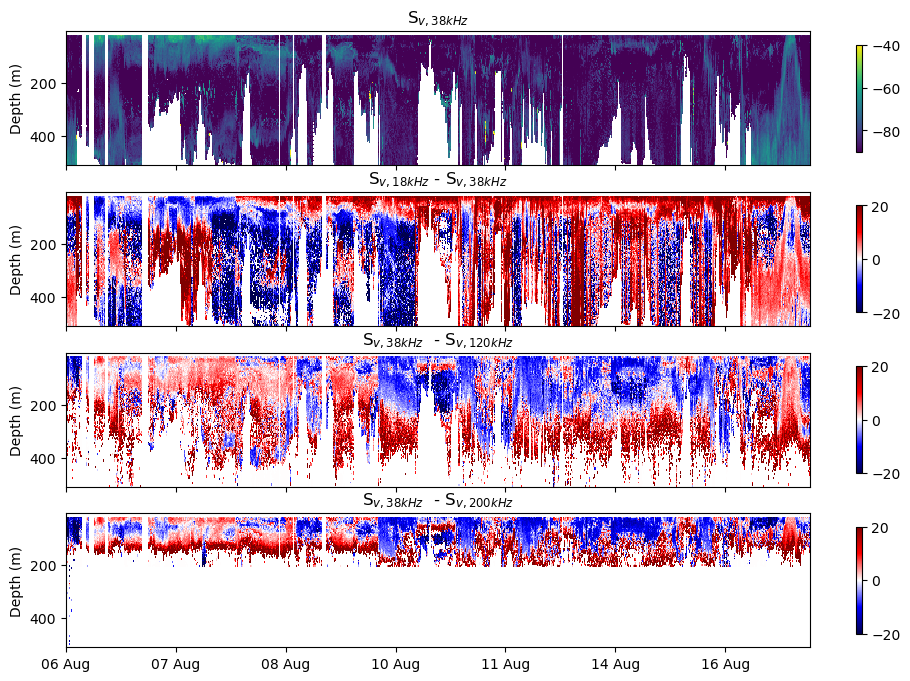

In [120]:
depth_cells = np.linspace(0,500,100)+7 # plus 7 for transducer depth

mask_Sv18_38 = Sv18_38.where(~(Sv18_38<-900) & ~(Sv18_38>900))
mask_Sv38_120 = Sv38_120.where(~(Sv38_120<-900) & ~(Sv38_120>900))
mask_Sv38_200 = Sv38_200.where(~(Sv38_200<-900) & ~(Sv38_200>900))
mask_Sv38 = Sv38.where(~(Sv38<-900) & ~(Sv38>900))

fig,axes = plt.subplots(4,1, figsize=(12,8))
ax = axes.flatten()

ax_sv = ax[0].pcolor(np.arange(np.shape(mask_Sv38)[1]), depth_cells, mask_Sv38 , vmin=-90, vmax=-40, cmap=mpl.colormaps['viridis'])
cbar = fig.colorbar(ax_sv, shrink=0.8)
ax[0].invert_yaxis()
ax[0].set_xticklabels([])
ax[0].set_title('S$_{v,38kHz}$ ')
ax[0].set_ylabel('Depth (m)')

ax_sv = ax[1].pcolor(np.arange(np.shape(mask_Sv18_38)[1]), depth_cells, mask_Sv18_38 , vmin=-20, vmax=20, cmap=mpl.colormaps['seismic'])
cbar = fig.colorbar(ax_sv, shrink=0.8)
ax[1].invert_yaxis()
ax[1].set_xticklabels([])
ax[1].set_title('S$_{v,18kHz}$ - S$_{v,38kHz}$ ')
ax[1].set_ylabel('Depth (m)')

ax_sv = ax[2].pcolor(np.arange(np.shape(mask_Sv38_120)[1]), depth_cells, mask_Sv38_120, vmin=-20, vmax=20, cmap=mpl.colormaps['seismic'])
cbar = fig.colorbar(ax_sv, shrink=0.8)
ax[2].invert_yaxis()
ax[2].set_xticklabels([])
ax[2].set_title('S$_{v,38kHz}$  - S$_{v,120kHz}$ ')
ax[2].set_ylabel('Depth (m)')

ax_sv = ax[3].pcolor(np.arange(np.shape(mask_Sv38_200)[1]), depth_cells, mask_Sv38_200, vmin=-20, vmax=20, cmap=mpl.colormaps['seismic'])
cbar = fig.colorbar(ax_sv, shrink=0.8)
ax[3].invert_yaxis()
ax[3].set_xticklabels([dtimes_18_38[0].strftime('%d %b'),
                       dtimes_18_38[0].strftime('%d %b'),
                       dtimes_18_38[2000].strftime('%d %b'),
                       dtimes_18_38[4000].strftime('%d %b'),
                       dtimes_18_38[6000].strftime('%d %b'),
                       dtimes_18_38[8000].strftime('%d %b'),
                       dtimes_18_38[10000].strftime('%d %b'),
                       dtimes_18_38[12000].strftime('%d %b')
                      ])
ax[3].set_title('S$_{v,38kHz}$  - S$_{v,200kHz}$')
ax[3].set_ylabel('Depth (m)')
fig.savefig('D:/Sermilik/Figs/dBDiff_timeseries.png', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

## Euphausiids

In [113]:
EuphA=-10; EuphAsd=3.4
EuphA1 = Sv18_38>(EuphA-EuphAsd)
EuphA2 = Sv18_38<(EuphA+EuphAsd)
EuphausiidsA = Sv18_38.where(EuphA1 & EuphA2)

EuphB = -13.8; EuphBsd=2.9
EuphB1 = Sv38_120>(EuphB-EuphBsd)
EuphB2 = Sv38_120<(EuphB+EuphBsd)
EuphausiidsB = Sv18_38.where(EuphB1 & EuphB2)

EuphC = -16.3; EuphCsd=2.9
EuphC1 = Sv38_200>(EuphC-EuphCsd)
EuphC2 = Sv38_200<(EuphC+EuphCsd)
EuphausiidsC = Sv18_38.where(EuphC1 & EuphC2)

EuphD = -9.5; EuphDsd=4
EuphD1 = Sv38_70>(EuphD-EuphDsd)
EuphD2 = Sv38_70<(EuphD+EuphDsd)
EuphausiidsD = Sv18_38.where(EuphD1 & EuphD2)

Euphausiids = EuphausiidsB.where(~np.isnan(EuphausiidsC) & ~np.isnan(EuphausiidsD))

Euphausiids_38 = Sv38.where(~np.isnan(Euphausiids))

## Jellyfish

In [121]:
JellyA=8.2; JellyAsd=1.5
JellyA1 = Sv18_38>(JellyA-JellyAsd)
JellyA2 = Sv18_38<(JellyA+JellyAsd)
JellyfishA = Sv18_38.where(JellyA1 & JellyA2)

JellyB = 2.1; JellyBsd=1.2
JellyB1 = Sv38_120>(JellyB-JellyBsd)
JellyB2 = Sv38_120<(JellyB+JellyBsd)
JellyfishB = Sv18_38.where(JellyB1 & JellyB2)

JellyC = 2.2; JellyCsd=1.3
JellyC1 = Sv38_200>(JellyC-JellyCsd)
JellyC2 = Sv38_200<(JellyC+JellyCsd)
JellyfishC = Sv18_38.where(JellyC1 & JellyC2)

Jellyfish = JellyfishA.where(~np.isnan(JellyfishB) & ~np.isnan(JellyfishC))

Jellyfish_38 = Sv38.where(~np.isnan(Jellyfish))

## Non-Swimbladdered
Following Eulachon category

In [122]:
EulaA=1.2; EulaAsd=3.2
EulaA1 = Sv18_38>(EulaA-EulaAsd)
EulaA2 = Sv18_38<(EulaA+EulaAsd)
EulachonA = Sv18_38.where(EulaA1 & EulaA2)

EulaB = -5.8; EulaBsd=2.8
EulaB1 = Sv38_120>(EulaB-EulaBsd)
EulaB2 = Sv38_120<(EulaB+EulaBsd)
EulachonB = Sv18_38.where(EulaB1 & EulaB2)

EulaC = 3.1; EulaCsd=2.5
EulaC1 = Sv38_200>(EulaC-EulaCsd)
EulaC2 = Sv38_200<(EulaC+EulaCsd)
EulachonC = Sv18_38.where(EulaC1 & EulaC2)

Eulachon = EulachonA.where(~np.isnan(EulachonB) & ~np.isnan(EulachonC))

Eulachon_38 = Sv38.where(~np.isnan(Eulachon))

## Capelin

In [123]:
CapA=2.7; CapAsd=2.8
CapA1 = Sv18_38>(CapA-CapAsd)
CapA2 = Sv18_38<(CapA+CapAsd)
CapelinA = Sv18_38.where(CapA1 & CapA2)

CapB = 3.8; CapBsd=1.7
CapB1 = Sv38_120>(EulaB-EulaBsd)
CapB2 = Sv38_120<(EulaB+EulaBsd)
CapelinB = Sv18_38.where(CapB1 & CapB2)

CapC = 3.6; CapCsd=1.8
CapC1 = Sv38_200>(CapC-CapCsd)
CapC2 = Sv38_200<(CapC+CapCsd)
CapelinC = Sv18_38.where(CapC1 & CapC2)

Capelin = CapelinA.where(~np.isnan(CapelinB) & ~np.isnan(CapelinC))

Capelin_38 = Sv38.where(~np.isnan(Capelin))

## Myctophids

In [124]:
MycA = -15; MycAsd = 1.8
MycA1 = Sv18_38>(MycA-MycAsd)
MycA2 = Sv18_38<(MycA+MycAsd)
MyctophidsA = Sv18_38.where(MycA1 & MycA2)

MycB = 9.2; MycBsd = 1
MycB1 = Sv38_120>(MycB-MycBsd)
MycB2 = Sv38_120<(MycB+MycBsd)
MyctophidsB = Sv18_38.where(MycB1 & MycB2)

Myctophids = MyctophidsA.where(~np.isnan(MyctophidsB))

Myctophids_38 = Sv38.where(~np.isnan(Myctophids))

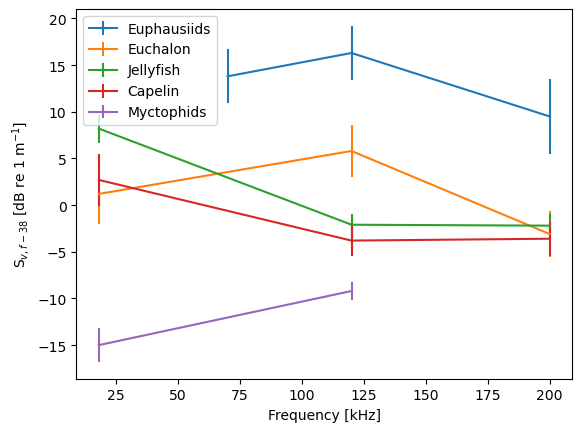

In [118]:
fig = plt. figure()
plt.errorbar([70,120,200], [ -EuphB, -EuphC, -EuphD], yerr=[ EuphBsd, EuphCsd, EuphDsd], label='Euphausiids')
plt.errorbar([18,120, 200], [EulaA, -EulaB, -EulaC], yerr=[EulaAsd, EulaBsd, EulaCsd], label='Euchalon')
plt.errorbar([18,120, 200], [JellyA, -JellyB, -JellyC], yerr=[JellyAsd, JellyBsd, JellyCsd], label='Jellyfish')
plt.errorbar([18,120, 200], [CapA, -CapB, -CapC], yerr=[CapAsd, CapBsd, CapCsd], label='Capelin')
plt.errorbar([18,120], [MycA, -MycB], yerr=[MycAsd, MycBsd], label='Myctophids')
plt.legend()
plt.xlabel('Frequency [kHz]')
plt.ylabel('S$_{v, f-38}$ [dB re 1 m$^{-1}$]')

fig.savefig('D:/Sermilik/Figs/dBDiff_categories.png', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

C:\Users\murield\AppData\Local\Temp\ipykernel_17384\691085524.py:7: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  ax[0].pcolor(dtimes_18_38, depth_cells, Myctophids_38)
C:\Users\murield\AppData\Local\Temp\ipykernel_17384\691085524.py:11: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  ax[1].pcolor(dtimes_18_38, depth_cells, Capelin_38)
C:\Users\murield\AppData\Local\Temp\ipykernel_17384\691085524.py:16: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, pl

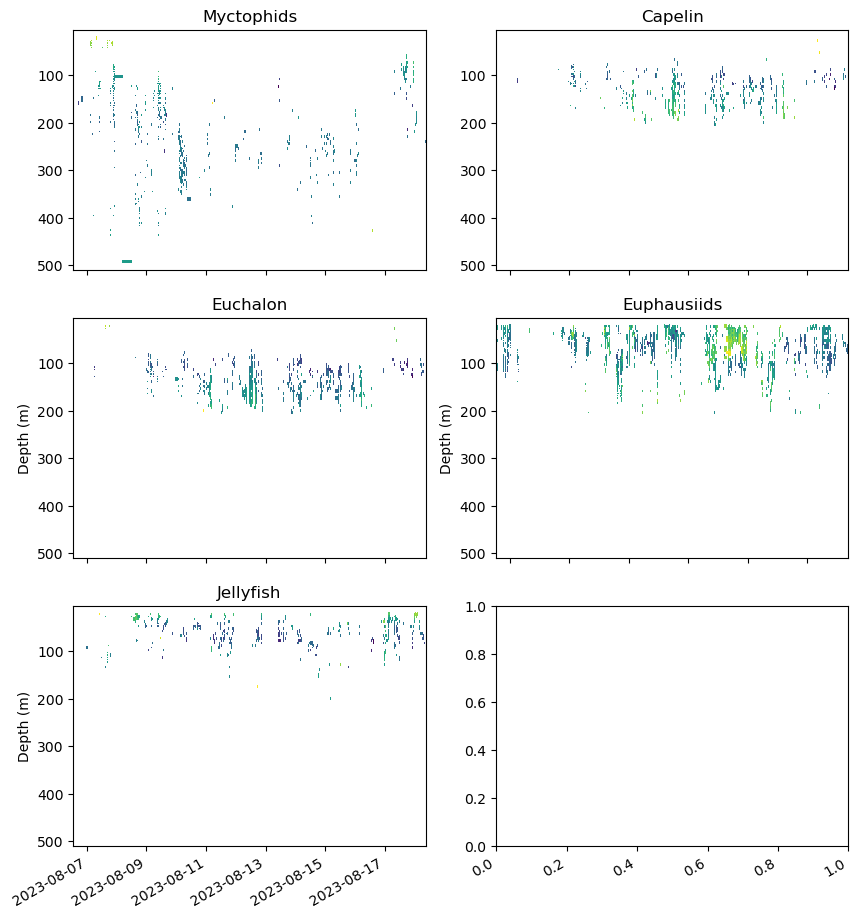

In [140]:
GPS_dist = Sv18_38[1]

fig,axes = plt.subplots(3,2, figsize=(10,12))
ax = axes.flatten()


ax[0].pcolor(dtimes_18_38, depth_cells, Myctophids_38)
ax[0].invert_yaxis()
ax[0].set_title('Myctophids')

ax[1].pcolor(dtimes_18_38, depth_cells, Capelin_38)
ax[1].invert_yaxis()
ax[1].set_title('Capelin')
plt.gcf().autofmt_xdate()

ax[2].pcolor(dtimes_18_38, depth_cells, Eulachon_38)
ax[2].invert_yaxis()
ax[2].set_title('Euchalon')
ax[2].set_ylabel('Depth (m)')

ax[3].pcolor(dtimes_18_38, depth_cells, Euphausiids_38)
ax[3].invert_yaxis()
ax[3].set_title('Euphausiids')
ax[3].set_ylabel('Depth (m)')

ax[4].pcolor(dtimes_18_38, depth_cells, Jellyfish_38)
ax[4].invert_yaxis()
ax[4].set_title('Jellyfish')
ax[4].set_ylabel('Depth (m)')
plt.gcf().autofmt_xdate()

## Vertical profiles

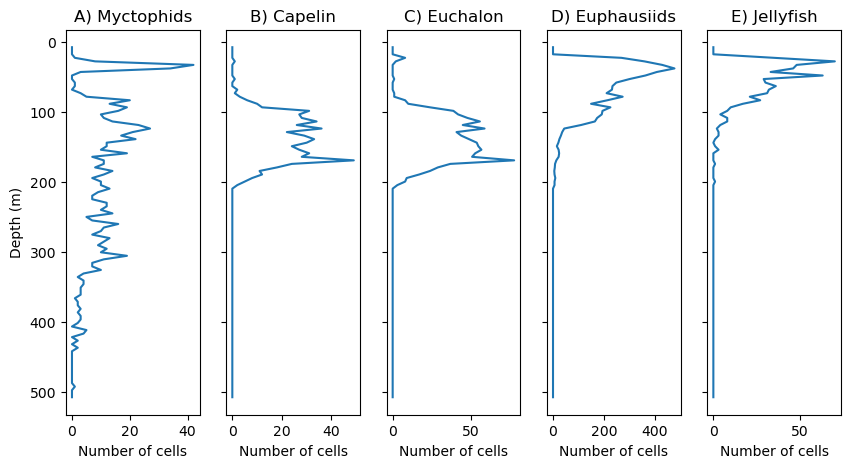

In [152]:
fig,axes = plt.subplots(1,5, figsize=(10,5), sharey=True)
ax = axes.flatten()


ax[0].plot(np.sum(~np.isnan(Myctophids_38),axis=1), depth_cells)
ax[0].invert_yaxis()
ax[0].set_title('A) Myctophids')
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('Number of cells')


ax[1].plot(np.sum(~np.isnan(Capelin_38),axis=1), depth_cells)
ax[1].invert_yaxis()
ax[1].set_title('B) Capelin')
ax[1].set_xlabel('Number of cells')

ax[2].plot(np.sum(~np.isnan(Eulachon_38),axis=1), depth_cells)
ax[2].invert_yaxis()
ax[2].set_title('C) Euchalon')
ax[2].set_xlabel('Number of cells')


ax[3].plot(np.sum(~np.isnan(Euphausiids_38),axis=1), depth_cells)
ax[3].invert_yaxis()
ax[3].set_title('D) Euphausiids')
ax[3].set_xlabel('Number of cells')


ax[4].plot(np.sum(~np.isnan(Jellyfish_38),axis=1), depth_cells)
ax[4].invert_yaxis()
ax[4].set_title('E) Jellyfish')
ax[4].set_xlabel('Number of cells')

fig.savefig('D:/Sermilik/Figs/Vertical_profiles.png', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')